In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import time
import functions
import datetime

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [ ]:
# 6 - 11
# 11 - 14
# 14 - 17
# 17 - 21
# 21 - 6

# every 6 hours

In [3]:
from importlib import reload
reload(functions)

<module 'functions' from '/Users/miguel/Desktop/HW2/ADMSecondHomework/functions.py'>

In [4]:
df = functions.passengers_NY_all_months(df_names)

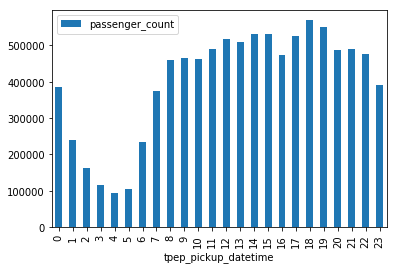

In [5]:
functions.plot_NY_24_hours(df)

In [6]:
df.head()

,tpep_pickup_datetime,passenger_count
0,2018-01-01 00:21:05,1
1,2018-01-01 00:44:55,1
2,2018-01-01 00:08:26,2
3,2018-01-01 00:20:22,1
4,2018-01-01 00:09:18,2


In [39]:
plots_colors = ['royalblue', 'orange', 'violet', 'coral', 'darkcyan', 'crimson', 'mediumseagreen']

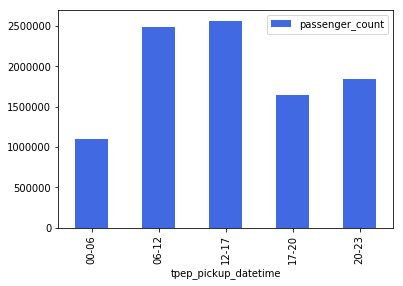

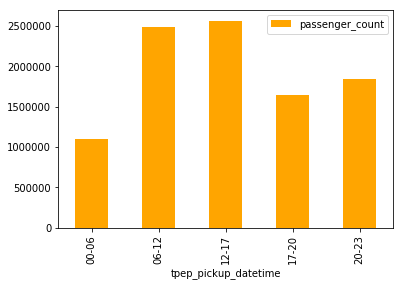

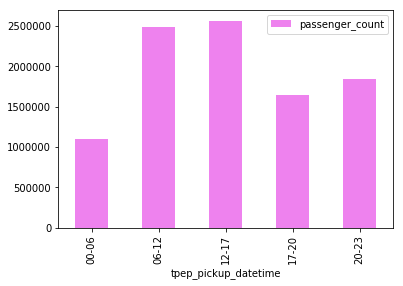

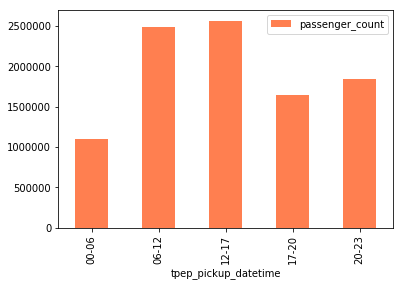

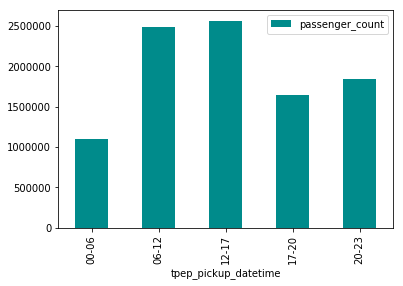

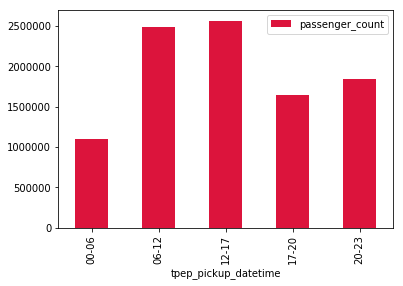

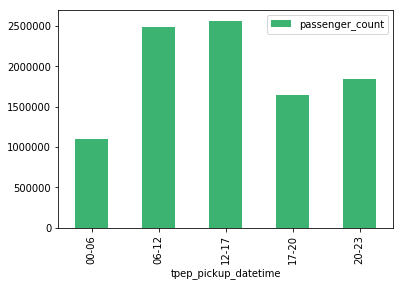

In [41]:
#functions.time_slots_and_plot(df,plots_colors[6])

for i in range (len(plots_colors)):
    functions.time_slots_and_plot(df,plots_colors[i])



In [ ]:
df.head()

# Doing that for each borough

In [ ]:
# making our df

df = pd.DataFrame()

for i in range (len(df_names)):
    temp = pd.read_csv(df_names[i], usecols= ['tpep_pickup_datetime', 'passenger_count'],
                 parse_dates= ["tpep_pickup_datetime"])
    
    
    print("temp = %d" %temp.shape[0], "tot+= %d" %tot )
    df = df.append(temp)
    

In [ ]:
i = 0

In [ ]:
df = pd.read_csv(df_names[i], usecols= ['tpep_pickup_datetime', 'passenger_count', 'PULocationID'],
                 parse_dates= ["tpep_pickup_datetime"])

df = pd.merge(df,taxi_zone_lookup, how = "left", left_on="PULocationID", right_on= "LocationID")

df = df.drop(axis =1, columns = ['PULocationID', 'LocationID', 'Zone', 'service_zone'])

In [ ]:
df.head()

In [ ]:
df = df.groupby(["Borough","tpep_pickup_datetime"]).sum()

In [ ]:
borough_lst


In [ ]:
# for every sub dataframe (grouped by borough)
for i in range(len(borough_lst)):
    # temp is our new sub dataframe
    temp = df.loc[borough_lst[i]].head()
    
    

In [ ]:
i = 0

In [ ]:
temp = df.loc[borough_lst[i]]


In [ ]:
temp.head()

In [ ]:
temp = temp.groupby(temp.index.hour).sum()

In [ ]:
temp

In [ ]:
#temp = temp.groupby(temp.tpep_pickup_datetime).sum()

In [ ]:
#temp.head()

In [ ]:
temp.reset_index(inplace=True)

In [ ]:
temp.head()

In [ ]:
temp['tpep_pickup_datetime'] = temp.tpep_pickup_datetime.apply(time_slots)

In [ ]:
temp

In [ ]:
temp = temp.groupby('tpep_pickup_datetime').sum()

In [ ]:
#PLOT CAZZO
temp.plot(kind='bar',color="orange")